In [1]:
import sys
sys.path.append('../')
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', context='poster')
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from figures.plotting import plot_correlations

benchmark = 'dicarlo.MajajHong2015.IT.public-pls'
eigmetric = 'effective dimensionality'
pooling = True

data = pd.merge(pd.read_csv(f'../results/encoding|benchmark:{benchmark}|pooling:{pooling}.csv'),
                pd.read_csv(f'../results/eigmetrics|pooling:{pooling}.csv'), 
                on=['architecture', 'task', 'kind', 'source', 'layer'])

tf_to_pt_layer_map = {'encode_2': 'layer1.0.relu', 'encode_3': 'layer1.1.relu', 
                      'encode_4': 'layer2.0.relu', 'encode_5': 'layer2.1.relu', 
                      'encode_6': 'layer3.0.relu', 'encode_7': 'layer3.1.relu', 
                      'encode_8': 'layer4.0.relu', 'encode_9': 'layer4.1.relu'}
data.loc[:, 'layer'] = data['layer'].replace(tf_to_pt_layer_map)

data.head()

,layer,score,score_error,architecture,task,kind,source,effective dimensionality
0,layer1.0.relu,0.133694,0.002729,ResNet18,None,Untrained,PyTorch,2.787072
1,layer1.1.relu,0.121728,0.003566,ResNet18,None,Untrained,PyTorch,2.731918
2,layer2.0.relu,0.140568,0.004316,ResNet18,None,Untrained,PyTorch,3.199565
3,layer2.1.relu,0.131325,0.002370,ResNet18,None,Untrained,PyTorch,2.921467
4,layer3.0.relu,0.124985,0.003400,ResNet18,None,Untrained,PyTorch,3.456479


---
# Untrained and Supervised Object Classification

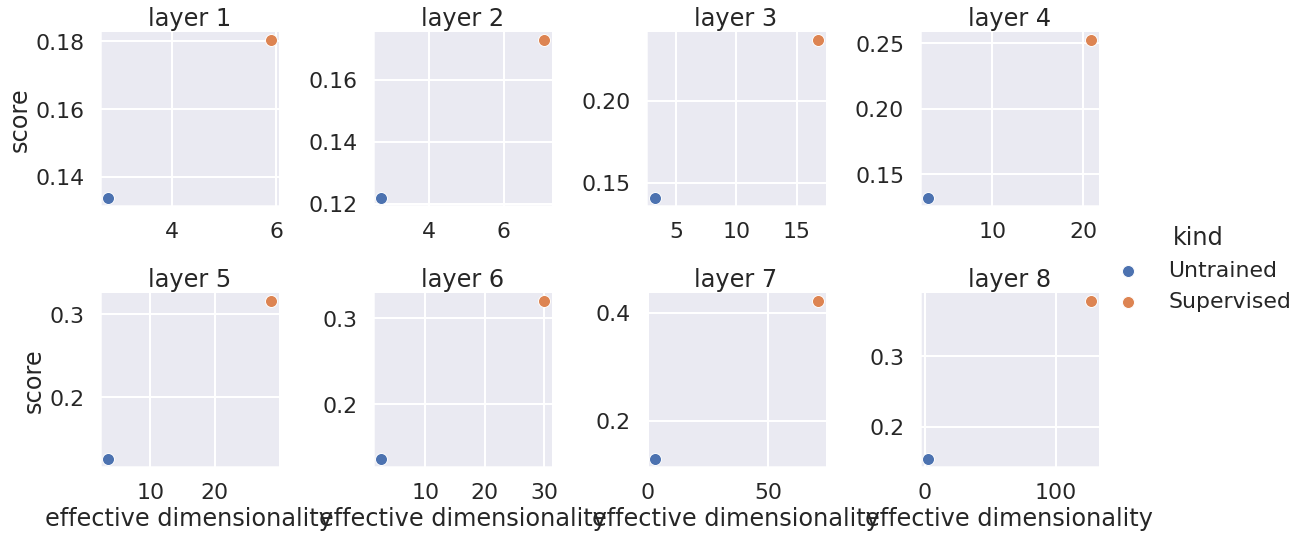

In [9]:
results = data[(data.source == 'PyTorch') & 
               (data.architecture == 'ResNet18')]
g = plot_correlations(data=results, x=eigmetric, y='score', hue='kind', grid='layer', 
                      grid_kwargs={'height': 4, 'sharex': False, 'sharey': False, 'col_wrap': 4})
for i, ax in enumerate(g.axes.flat):
    ax.set_title(f'layer {i + 1}')
g.add_legend()
plt.show()

---
# Yamins Self-Supervised

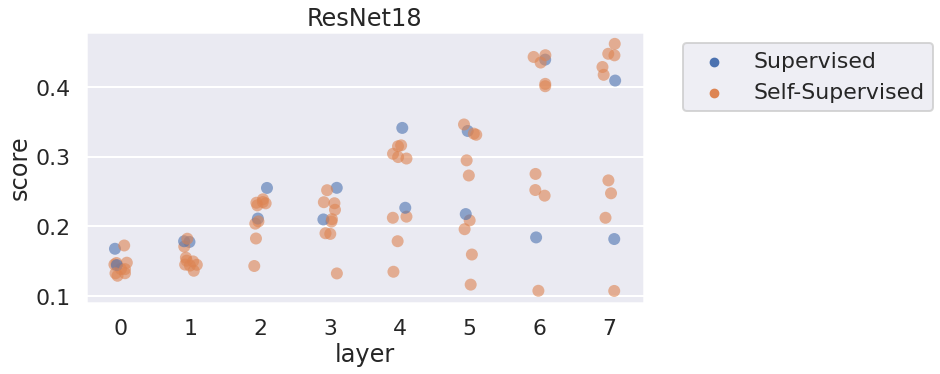

In [7]:
results = data[(data.source == 'VVS')]
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(x='layer', y='score', data=results, ax=ax, hue='kind',
              hue_order=['Supervised', 'Self-Supervised'], s=12, alpha=0.6)
ax.set_xticklabels(ax.get_xticks())
ax.set_title('ResNet18')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

---
# Taskonomy

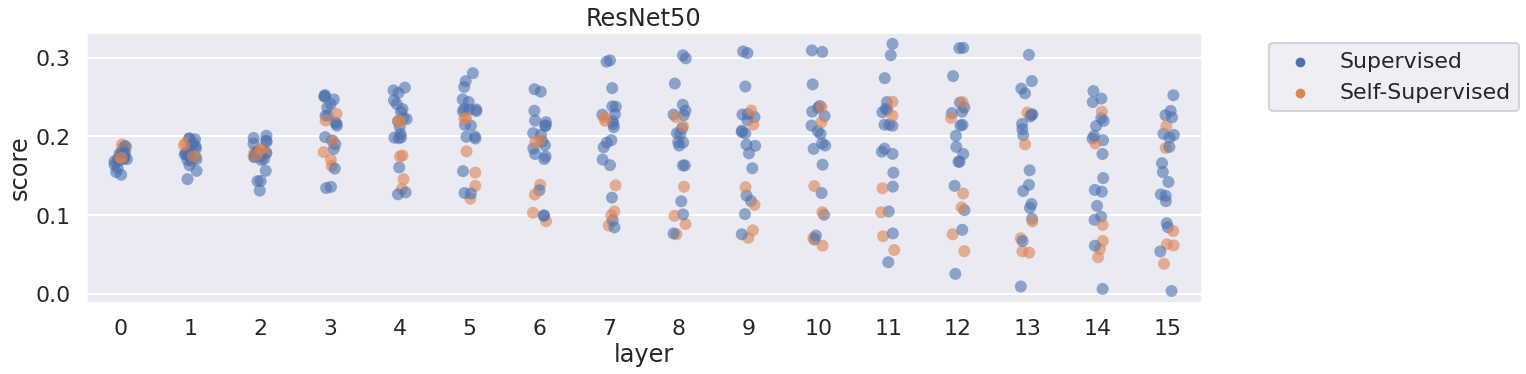

In [14]:
results = data[(data.source == 'Taskonomy')]
fig, ax = plt.subplots(figsize=(20, 5))
sns.stripplot(x='layer', y='score', data=results, ax=ax, hue='kind', 
              hue_order=['Supervised', 'Self-Supervised'], s=12, alpha=0.6)
ax.set_xticklabels(ax.get_xticks())
ax.set_title('ResNet50')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()